Today we're going to utilize a very simple (but rich) data set housed in the UCI Machine Learning repository. The Adult Income Dataset is taken from US Census information and is formatted particularly well to study the features/regressors/predictors that go into determining whether an adult US resident is 'likely' to have a household income greater than $50,000. 

The data includes age, workclass, a weight variable (to account for the unbalanced sampling), education level, time spent in education (in years), marital status, occupation, relationship, race, sex, individuals residency, and a target column that indicates whether the person attained a household income greater than $50,000. All in all, an interested data set for socio-economic research. So let's get our hands dirty and load up some data!

In [191]:
from sklearn import naive_bayes
import pandas as pd
import numpy as np
import matplotlib as plt
%matplotlib inline

# Load the data 

Load the adult data set, which is just .txt file. There are no column labels. Read the docs for the data set here: https://archive.ics.uci.edu/ml/datasets/Adult, and use the in-built Pandas dataframe options to attach the column labels into the data frame. 

In [192]:
adult_income = pd.read_table('https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data', sep=',')

In [193]:
adult_income.head()

,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [194]:
columns =  ['age',
            'workclass',
            'fnlwgt',
            'education',
            'educationnum',
            'maritalstatus',
            'occupation',
            'relationship',
            'race',
            'sex',
            'capitalgain',
            'capitalloss',
            'hoursperweek',
            'nativecountry',
            'income'
           ]

In [195]:
#Not the ideal way to label, but to expidite this exercise I'm using the below
adult_income.columns = columns
adult_income.head()

,age,workclass,fnlwgt,education,educationnum,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,nativecountry,income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [196]:
columns =  ['workclass',
            'maritalstatus',
            'education',
            'occupation',
            'relationship',
            'race',
            'sex',
            'nativecountry',
            'income']

for col in columns:
    adult_income[col] = adult_income[col].str.strip()

In [197]:
zip(adult_income.education.unique(), adult_income['educationnum'].unique())

[('Bachelors', 13),
 ('HS-grad', 9),
 ('11th', 7),
 ('Masters', 14),
 ('9th', 5),
 ('Some-college', 10),
 ('Assoc-acdm', 12),
 ('Assoc-voc', 11),
 ('7th-8th', 4),
 ('Doctorate', 16),
 ('Prof-school', 15),
 ('5th-6th', 3),
 ('10th', 6),
 ('1st-4th', 2),
 ('Preschool', 1),
 ('12th', 8)]

In [198]:
adult_income.drop(labels='education', axis=1, inplace=True)

# Convert the categorical variables into unordered integral values

For us to use the scikit-learn (although not every implementation of) Naive Bayes, we must pass in numerical data. Since we have decided to analyze all unordered categorical values, we can do a one-hot encoding to convert our categorical data into a numerical data frame.

**Note**: Do not use scikit-learn's implementation of One-hot encoding, we want to get you familiar with a bunch of methods, but as you should know by now, there are many ways to do the same thing. If you want, to a challenge, you can write the procedure both from scikit-learn and Pandas method. 

In [199]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [200]:
col_convert =  ['workclass',
                'maritalstatus',
                'occupation',
                'relationship',
                'race',
                'sex',
                'nativecountry',
                'income']

In [201]:
for col in col_convert:
    le.fit(adult_income[col])
    transformed = le.transform(le.classes_)
    dictionary = dict(zip(adult_income[col].unique(), transformed))
    adult_income[col] = adult_income[col].map(dictionary)
    print col + ' dictionary:'
    print dictionary
    print

adult_income.head(10)

workclass dictionary:
{'Self-emp-inc': 6, 'State-gov': 2, 'Without-pay': 7, 'Private': 1, 'Local-gov': 4, 'Self-emp-not-inc': 0, 'Federal-gov': 3, 'Never-worked': 8, '?': 5}

maritalstatus dictionary:
{'Separated': 4, 'Widowed': 6, 'Divorced': 1, 'Married-spouse-absent': 2, 'Never-married': 3, 'Married-AF-spouse': 5, 'Married-civ-spouse': 0}

occupation dictionary:
{'Farming-fishing': 8, 'Armed-Forces': 13, 'Craft-repair': 6, 'Other-service': 3, 'Transport-moving': 7, 'Prof-specialty': 2, 'Sales': 5, 'Exec-managerial': 0, 'Handlers-cleaners': 1, '?': 11, 'Adm-clerical': 4, 'Protective-serv': 12, 'Tech-support': 10, 'Priv-house-serv': 14, 'Machine-op-inspct': 9}

relationship dictionary:
{'Own-child': 3, 'Wife': 2, 'Unmarried': 4, 'Other-relative': 5, 'Husband': 0, 'Not-in-family': 1}

race dictionary:
{'Asian-Pac-Islander': 2, 'Amer-Indian-Eskimo': 3, 'White': 0, 'Other': 4, 'Black': 1}

sex dictionary:
{'Male': 0, 'Female': 1}

nativecountry dictionary:
{'Canada': 10, 'Hong': 38, 'Dom

,age,workclass,fnlwgt,educationnum,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,nativecountry,income
0,50,0,83311,13,0,0,0,0,0,0,0,13,0,0
1,38,1,215646,9,1,1,1,0,0,0,0,40,0,0
2,53,1,234721,7,0,1,0,1,0,0,0,40,0,0
3,28,1,338409,13,0,2,2,1,1,0,0,40,1,0
4,37,1,284582,14,0,0,2,0,1,0,0,40,0,0
5,49,1,160187,5,2,3,1,1,1,0,0,16,2,0
6,52,0,209642,9,0,0,0,0,0,0,0,45,0,1
7,31,1,45781,14,3,2,1,0,1,14084,0,50,0,1
8,42,1,159449,13,0,0,0,0,0,5178,0,40,0,1
9,37,1,280464,10,0,0,0,1,0,0,0,80,0,1


# Challenge Problem: Alternative Encoding Scheme to One-Hot Encoding

Likewise, beside doing a One-hot encoding, we could also map each string label in our categorical features to a integral value. As we previously leveraged a Pandas data frame method to do the encoding, we are now going to test out a scikit-learn method to impose the integral value encoding. Please check the docs and read up on: http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html. Proceed with the encoding and build a Naive Bayes and Logistic classifier for both. Do we get similar results? What should we expect? And why?

In [ ]:
#Already done above

# Summarize the data and engage in elementary data exploration

For some data exploration, use Pandas histogram methods to display the features. 

In [86]:
import seaborn as sb

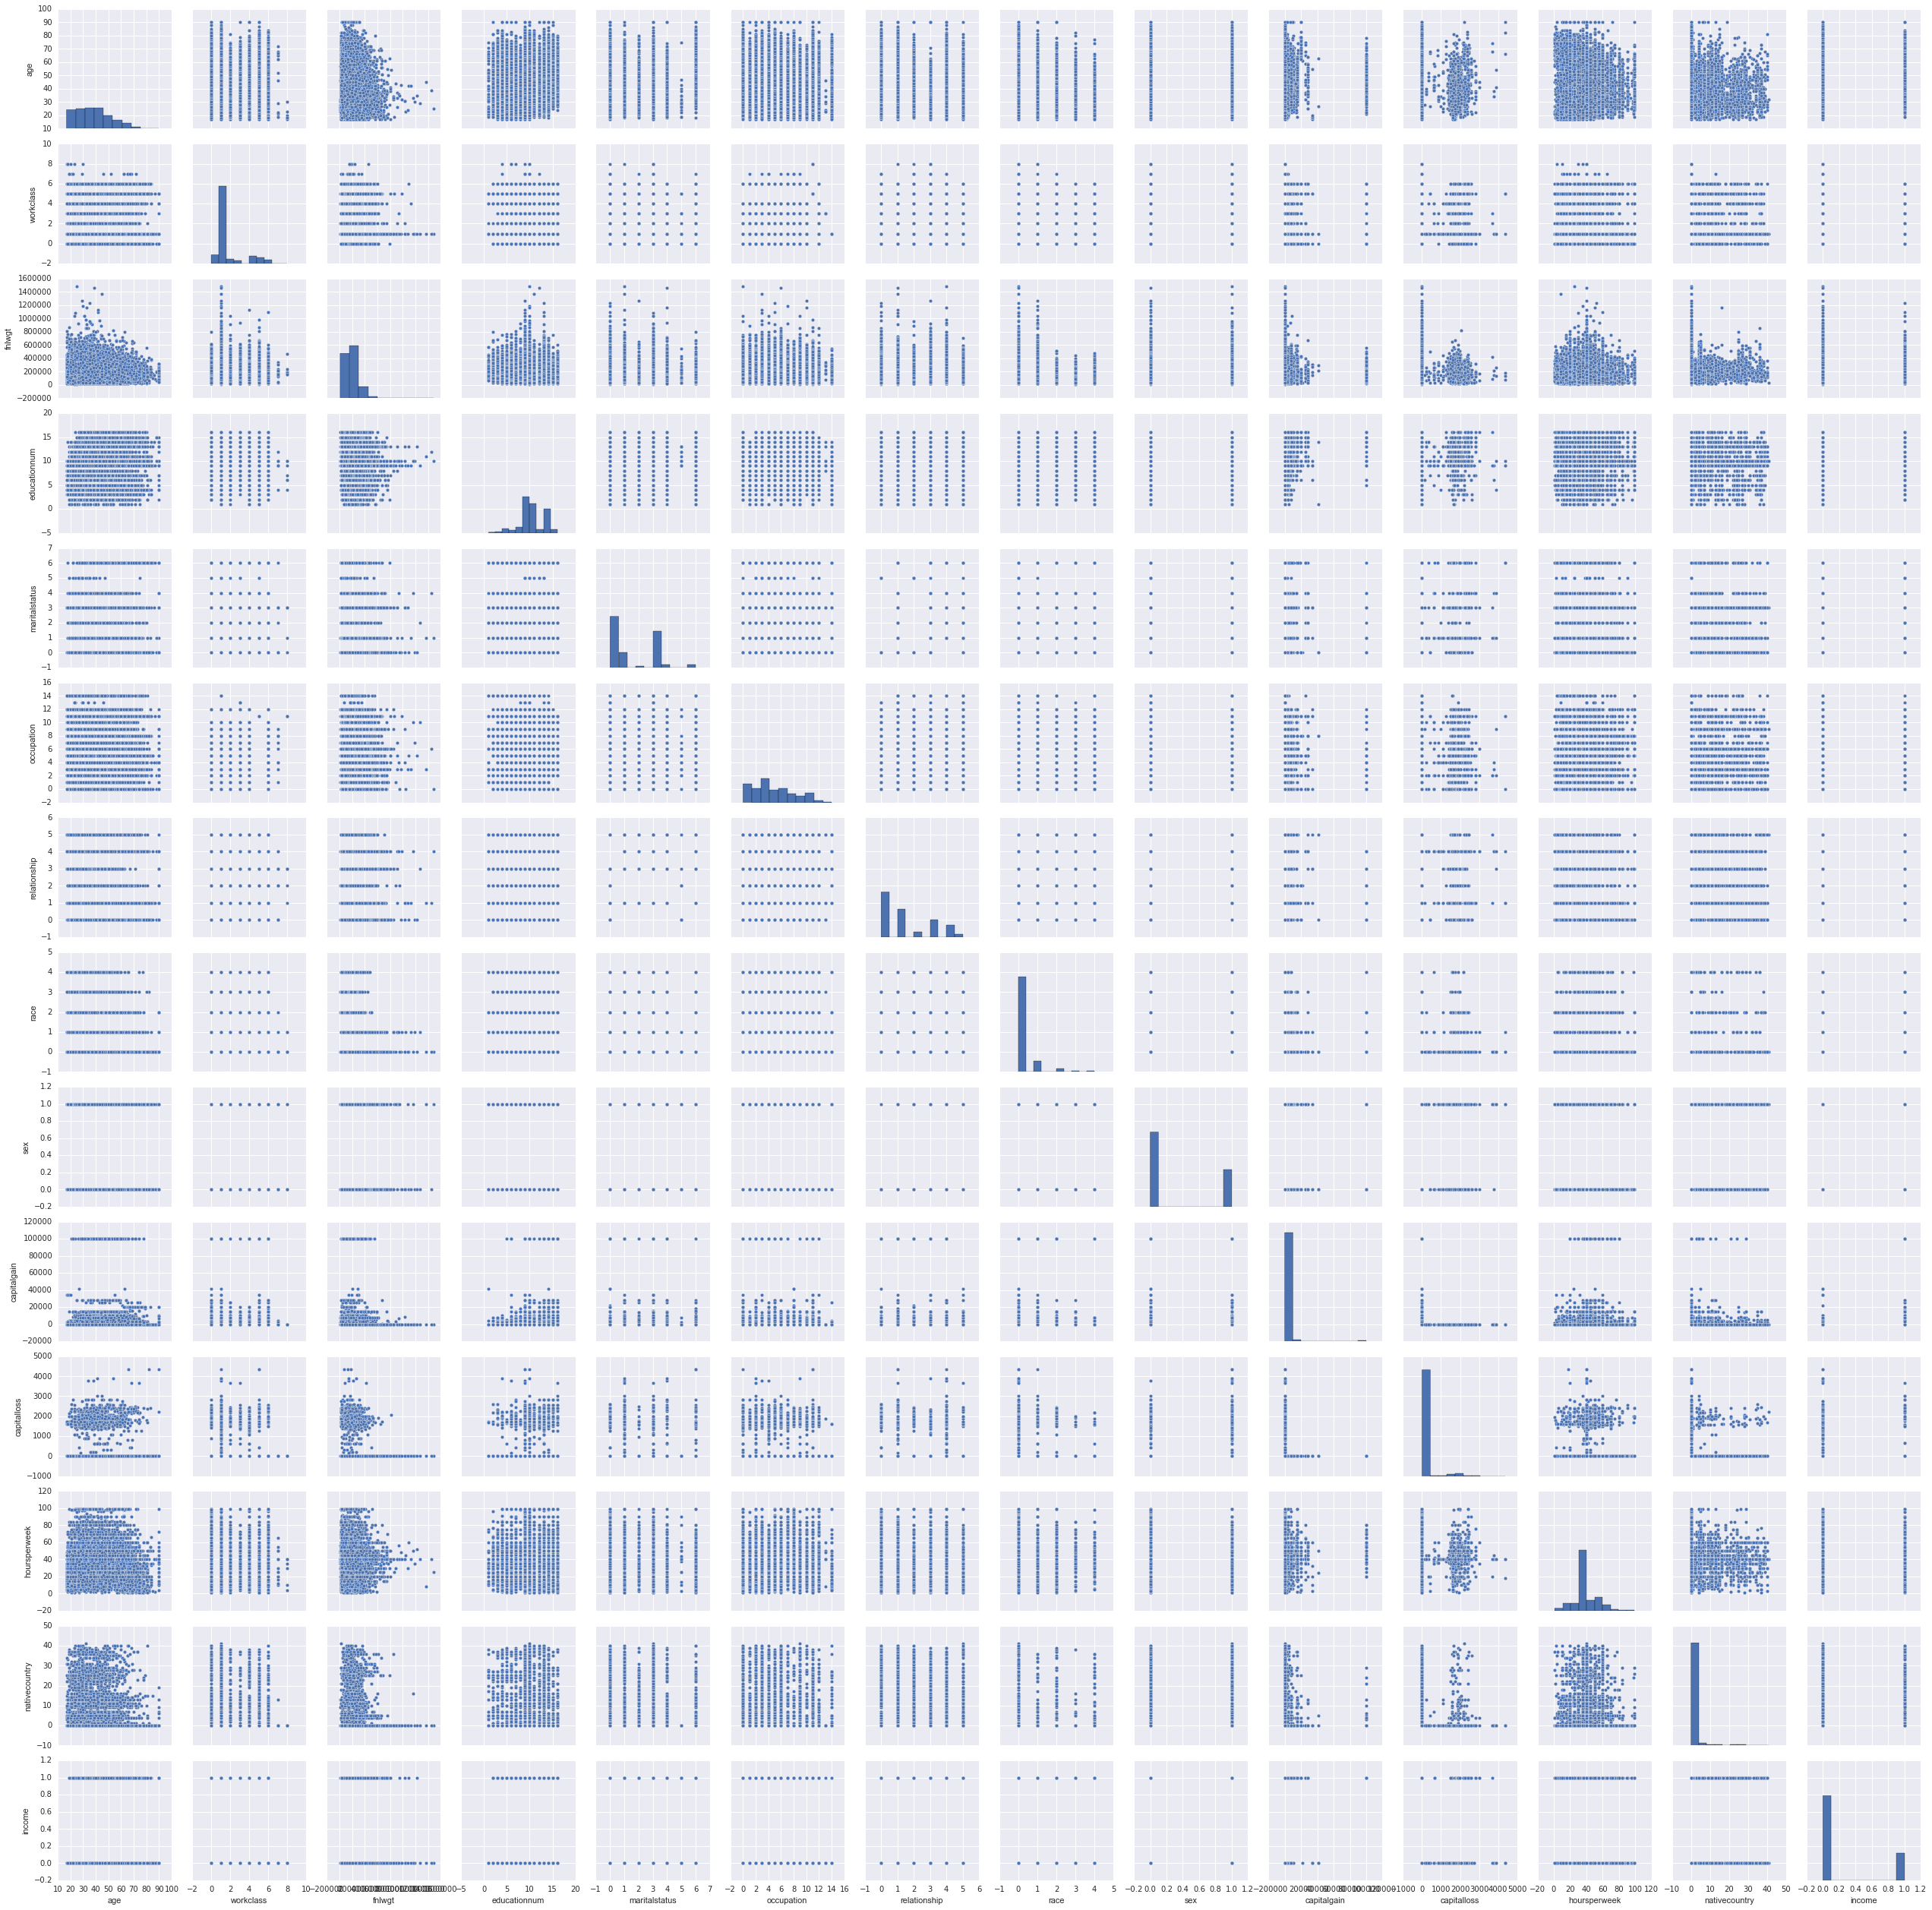

In [202]:
sb.pairplot(adult_income)

# Partition the data

Without using any direct method/libraries that would automatically accomplish this, please partition the data set 70/30. You can use anything from the math, pandas, or numpy library, do not use other libraries. 

# Define your feature set and define your target 

In [208]:
from sklearn.cross_validation import train_test_split

In [209]:
[str(x) for x in adult_income.columns]

['age',
 'workclass',
 'fnlwgt',
 'educationnum',
 'maritalstatus',
 'occupation',
 'relationship',
 'race',
 'sex',
 'capitalgain',
 'capitalloss',
 'hoursperweek',
 'nativecountry',
 'income']

In [210]:
X = adult_income[['age',
                 'workclass',
                 'fnlwgt',
                 'educationnum',
                 'maritalstatus',
                 'occupation',
                 'relationship',
                 'race',
                 'sex',
                 'capitalgain',
                 'capitalloss',
                 'hoursperweek',
                 'nativecountry']]

y = adult_income.income

In [211]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Run Naive Bayes Classifier

Instantiate the Naive Bayes predictor from scikit-learn with the training data. 

In [203]:
from sklearn.naive_bayes import MultinomialNB

In [ ]:
MultinomialNB()

# Check Accuracy / Score for Naive Bayes

Define the target and feature set for the test data

Score the Naive Bayes classifier on the test data

# Check Accuracy / Score for a Logistic Classifier 

Define a logistic regression and train it with the feature and target set

Produce the accuracy score of the logistic regression from the test set

Was that what you expected? All we did was remove non categorical variables, and imposed a One-hot encoding, should we have expected the Naive Bayes to underperform the Logistic? Here are some other things you can think about:

1. What other metrics outside of simple accuracy can we utilize to measure performance?
2. Could some pair-wise correlation between pair-wise features in our feature set have caused an issue with the Naive Bayes? What are the assumptions for Naive Bayes which may cause this to happen? 
3. How could we improve the performance of Naive Bayes? 
4. What about the numerica features we left out, should we bring them back in? How?

If you want to expand on your analysis, why not build a correlation matrix, or perhaps print a summary of the logistic regression, would an ANOVA table help in our assessment for this case? 